![](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png)

# ** Projeto Final**
*  Aluno [Igor França](https://www.linkedin.com/in/igorsiilva07/)

## 1\. Entendimento do negócio

O objetivo principal foi claramente definido: minimizar as perdas financeiras causadas por transações fraudulentas e proteger a segurança dos clientes de instituições financeiras. A fraude de cartão de crédito representa um risco significativo, afetando diretamente a receita, a reputação e a confiança do consumidor. O sucesso do projeto seria medido principalmente pela capacidade do modelo em identificar o maior número possível de transações fraudulentas (alto Recall), ao mesmo tempo em que se mantém um nível aceitável de falsos positivos (transações legítimas classificadas incorretamente como fraude), para evitar inconvenientes para os clientes e custos operacionais desnecessários. A métrica de AUC-ROC também seria crucial para avaliar a capacidade geral de discriminação do modelo entre as classes.

## 2\. Entendimento dos dados


A compreensão dos dados foi fundamental. Utilizamos um dataset de transações de cartão de crédito que continha features numéricas (V1-V28, resultantes de uma transformação PCA para anonimidade), além de Time (tempo desde a primeira transação) e Amount (valor da transação), e a variável alvo Class (0 para transações legítimas, 1 para fraudes).

### Dicionário de dados

| Coluna  | Descrição |
| ------- | --------- |
| Time    | Tempo decorrido em segundos entre esta transação e a primeira transação no dataset. |
| V1-V28  | Features numéricas resultantes de uma transformação PCA (Principal Component Analysis). São características transformadas da transação para proteger a privacidade dos dados originais. |
| Amount  | Valor da transação. |
| Class   | Variável alvo que indica se a transação é fraudulenta (1) ou legítima (0). |


In [18]:
import pandas as pd

# Caminho para o seu arquivo CSV
file_path = 'creditcard.csv'

try:
    # Carregar o dataset completo
    df = pd.read_csv(file_path)

    print("Dados carregados com sucesso!")
    print(f"Número total de transações (linhas): {len(df)}")
    print(f"Número de características/variáveis (colunas): {len(df.columns)}")

    print("\n--- Primeiras 5 linhas do DataFrame ---")
    print(df.head())

    print("\n--- Informações gerais do DataFrame (tipos de dados, não nulos) ---")
    df.info()

    print("\n--- Estatísticas Descritivas para colunas numéricas ---")
    print(df.describe())

    print("\n--- Verificação de valores ausentes por coluna ---")
    print(df.isnull().sum())

except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado.")
    print("Por favor, certifique-se de que o arquivo 'creditcard.csv' está no mesmo diretório do seu script/notebook, ou forneça o caminho completo para o arquivo.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar ou inspecionar o arquivo: {e}")

Dados carregados com sucesso!
Número total de transações (linhas): 284807
Número de características/variáveis (colunas): 31

--- Primeiras 5 linhas do DataFrame ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -

## 3\. Exploração dos Dados 

Análise Exploratória de Dados (AED) - Para o Problema de Fraude

Iniciando a Análise Exploratória de Dados (AED)...

--- Contagem de classes na variável 'Class' ---
Class
0    284315
1       492
Name: count, dtype: int64

--- Percentual de classes na variável 'Class' ---
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


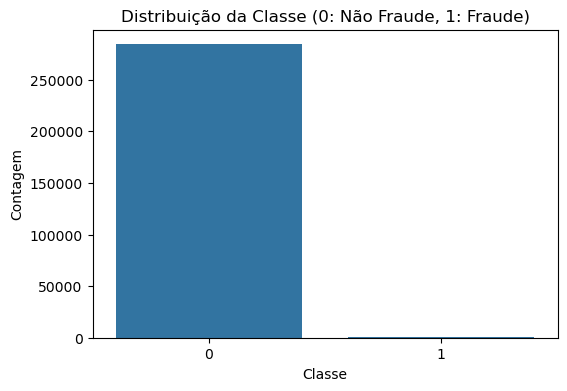


--- Estatísticas Descritivas para 'Amount' ---
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


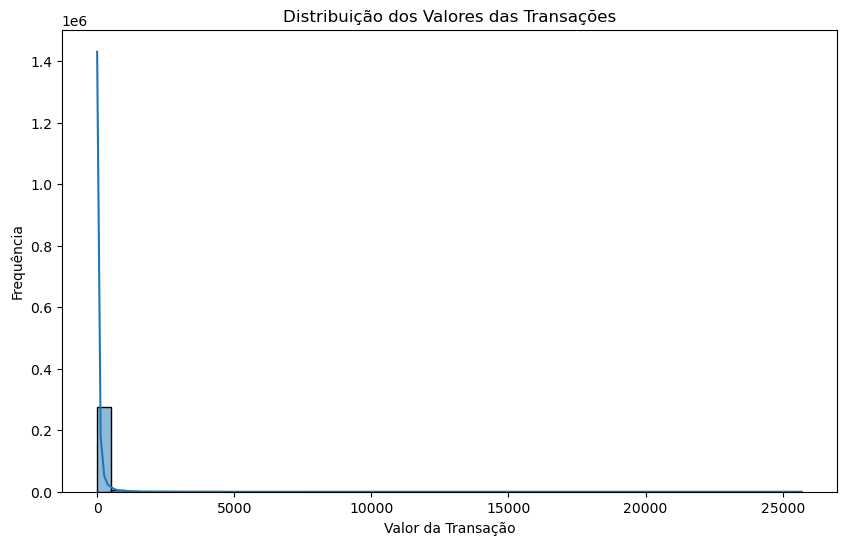

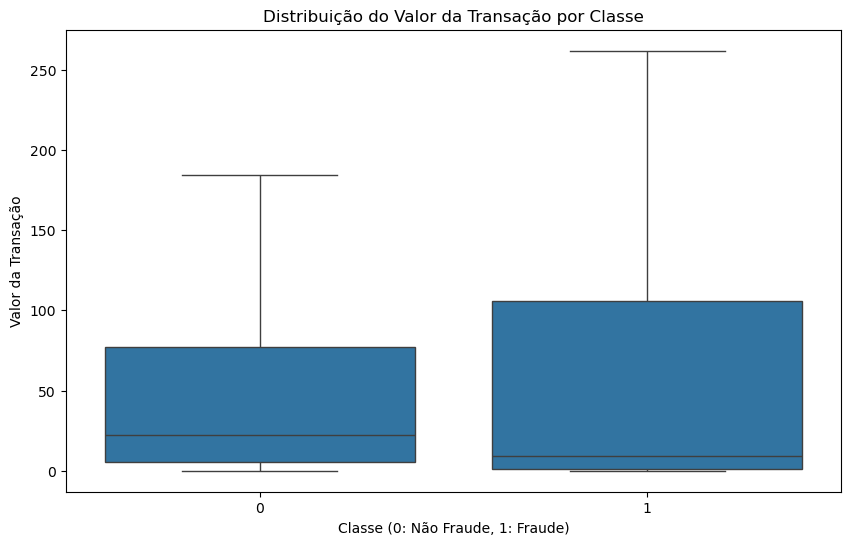


--- Estatísticas Descritivas para 'Time' ---
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


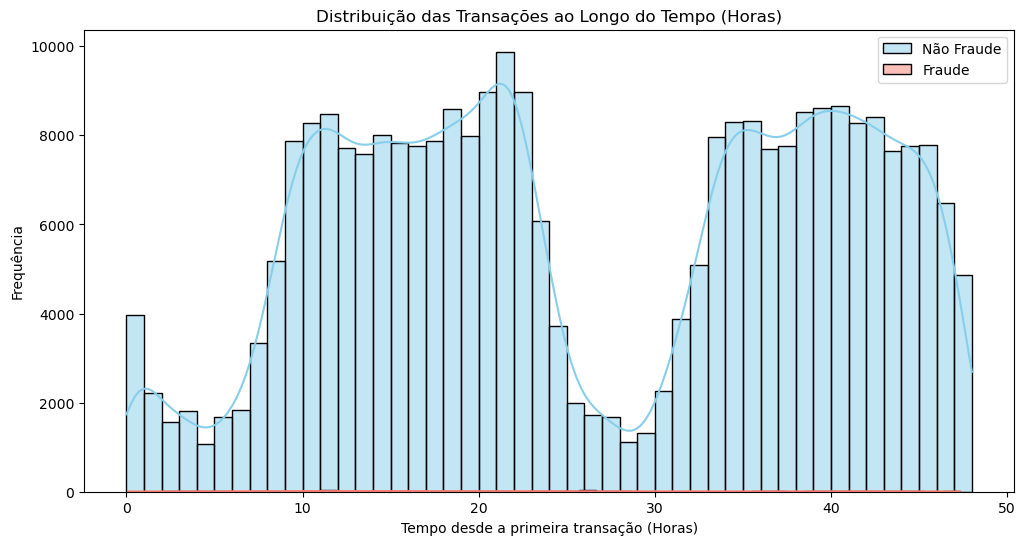

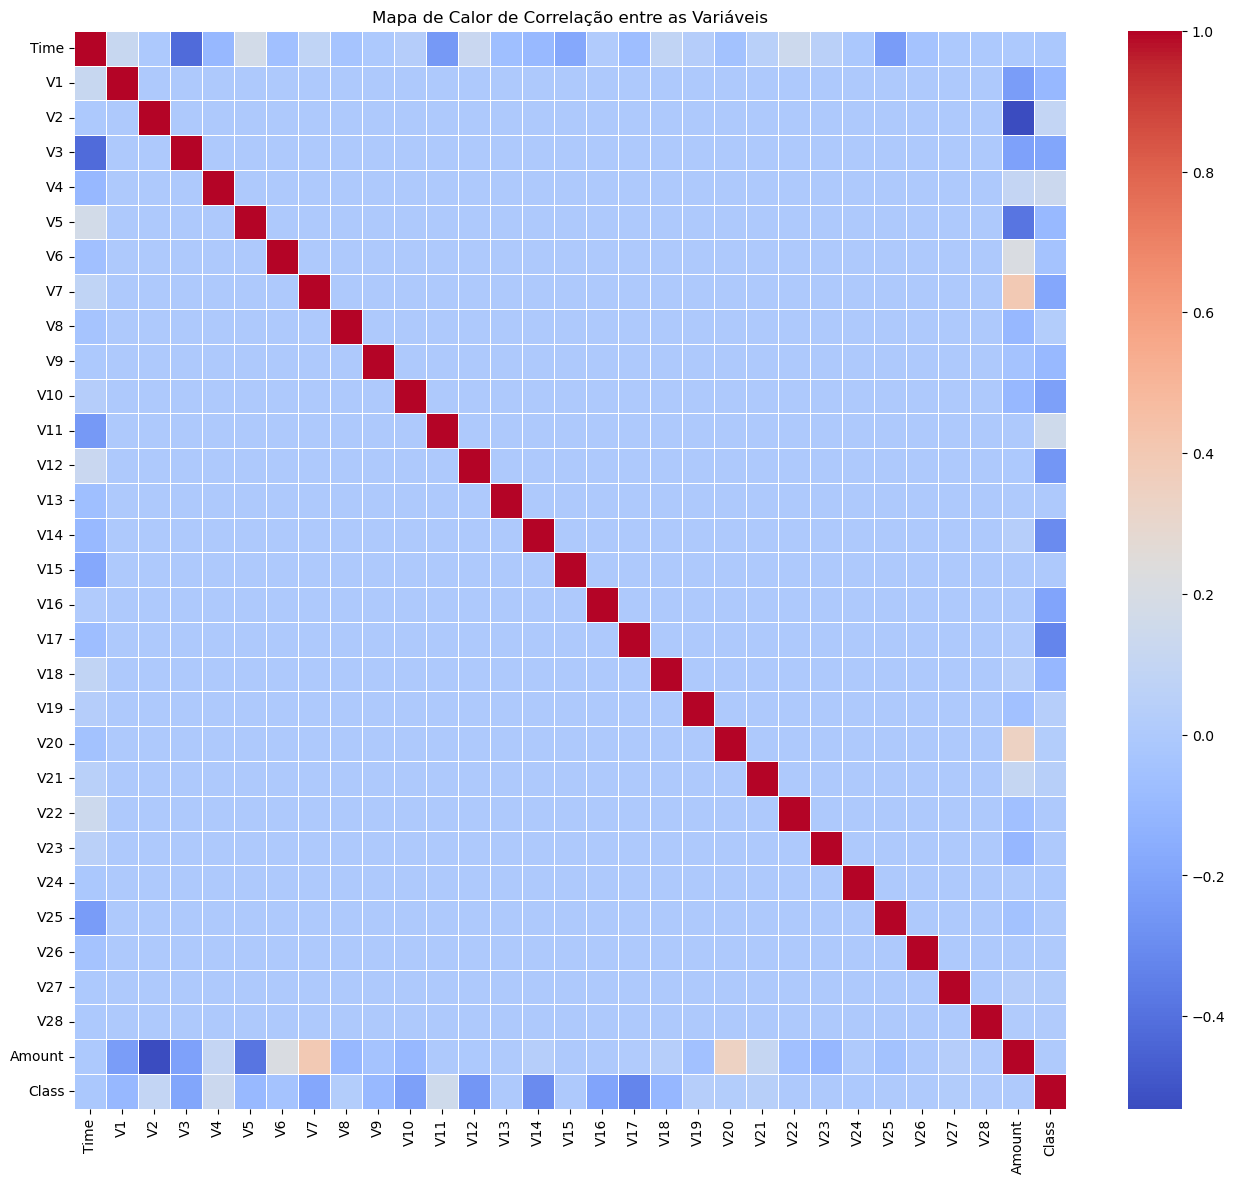


Análise Exploratória de Dados (AED) Concluída.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' está carregado neste ponto

print("Iniciando a Análise Exploratória de Dados (AED)...")

# 1. Verificar o balanceamento da classe (Fraude vs. Não Fraude)
print("\n--- Contagem de classes na variável 'Class' ---")
print(df['Class'].value_counts())
print("\n--- Percentual de classes na variável 'Class' ---")
print(df['Class'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribuição da Classe (0: Não Fraude, 1: Fraude)')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# 2. Análise da coluna 'Amount'
print("\n--- Estatísticas Descritivas para 'Amount' ---")
print(df['Amount'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribuição dos Valores das Transações')
plt.xlabel('Valor da Transação')
plt.ylabel('Frequência')
plt.show()

# Comparação de 'Amount' entre fraudes e não fraudes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False) # showfliers=False para não mostrar outliers extremos
plt.title('Distribuição do Valor da Transação por Classe')
plt.xlabel('Classe (0: Não Fraude, 1: Fraude)')
plt.ylabel('Valor da Transação')
plt.show()

# 3. Análise da coluna 'Time'
print("\n--- Estatísticas Descritivas para 'Time' ---")
print(df['Time'].describe())

# Distribuição das transações ao longo do tempo (em horas)
df_fraude = df[df['Class'] == 1].copy()
df_nao_fraude = df[df['Class'] == 0].copy()

plt.figure(figsize=(12, 6))
sns.histplot(df_nao_fraude['Time'] / 3600, bins=48, label='Não Fraude', kde=True, color='skyblue')
sns.histplot(df_fraude['Time'] / 3600, bins=48, label='Fraude', kde=True, color='salmon')
plt.title('Distribuição das Transações ao Longo do Tempo (Horas)')
plt.xlabel('Tempo desde a primeira transação (Horas)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# 4. Mapa de calor de correlação (para todas as features numéricas)
numeric_cols = df.select_dtypes(include=['number']).columns
df_corr = df[numeric_cols].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(df_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlação entre as Variáveis')
plt.show()

print("\nAnálise Exploratória de Dados (AED) Concluída.")

Limpeza e Proteção de Dados (Foco na Fraude)

In [20]:
import os
import psutil # Importe psutil para obter o número de núcleos lógicos da CPU
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd # Importar pandas aqui novamente para garantir que está disponível

try:
    os.environ['LOKY_MAX_CPU_COUNT'] = str(psutil.cpu_count(logical=True))
    print(f"LOKY_MAX_CPU_COUNT definido para {psutil.cpu_count(logical=True)} (núcleos lógicos) para silenciar avisos do joblib.")
except Exception as e:
    print(f"Não foi possível definir LOKY_MAX_CPU_COUNT: {e}")
    print("O aviso do joblib pode persistir, mas a execução deve continuar.")


# --- INÍCIO DA ETAPA DE LIMPEZA E PROTEÇÃO DE DADOS ---
print("\nIniciando a etapa de Limpeza e Proteção de Dados (Foco no Desbalanceamento)...")

# Separar features (X) e target (y)
# Supondo que 'df' já esteja carregado
X = df.drop('Class', axis=1)
y = df['Class']

print(f"Formato de X (features): {X.shape}")
print(f"Formato de y (target): {y.shape}")

# Escalonar 'Time' e 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

print("\nColunas 'Time' e 'Amount' escaladas com sucesso.")
print("Primeiras 5 linhas de X após escalonamento:")
print(X.head())

# Dividir dados em treino e teste ANTES de aplicar SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nFormato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")

print(f"\nProporção das classes em y_train antes do SMOTE: {Counter(y_train)}")
print(f"Proporção das classes em y_test: {Counter(y_test)}")

# Aplicar SMOTE APENAS no conjunto de treino
print("\nAplicando SMOTE no conjunto de treino...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Proporção das classes em y_train_resampled após SMOTE: {Counter(y_train_resampled)}")
print(f"Dimensões de X_train_resampled após SMOTE: {X_train_resampled.shape}")

print("\nLimpeza e Proteção de Dados (com tratamento de desbalanceamento) Concluída.")
print("Agora temos os conjuntos X_train_resampled, y_train_resampled, X_test, y_test prontos para a modelagem.")

LOKY_MAX_CPU_COUNT definido para 16 (núcleos lógicos) para silenciar avisos do joblib.

Iniciando a etapa de Limpeza e Proteção de Dados (Foco no Desbalanceamento)...
Formato de X (features): (284807, 30)
Formato de y (target): (284807,)

Colunas 'Time' e 'Amount' escaladas com sucesso.
Primeiras 5 linhas de X após escalonamento:
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775 

C:\Users\igors\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\igors\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\igors\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\igors\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\igors\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

## 4\. Modelagem
Construção de Modelo de Machine Learning

LOKY_MAX_CPU_COUNT definido para 16 (núcleos lógicos) para silenciar avisos do joblib.
Iniciando a etapa de Modelagem...

Treinando o modelo de Regressão Logística...
Regressão Logística treinada.

--- Avaliação do Modelo de Regressão Logística ---
Matriz de Confusão:
[[55401  1463]
 [    8    90]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

AUC-ROC Score: 0.9698


C:\Users\igors\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


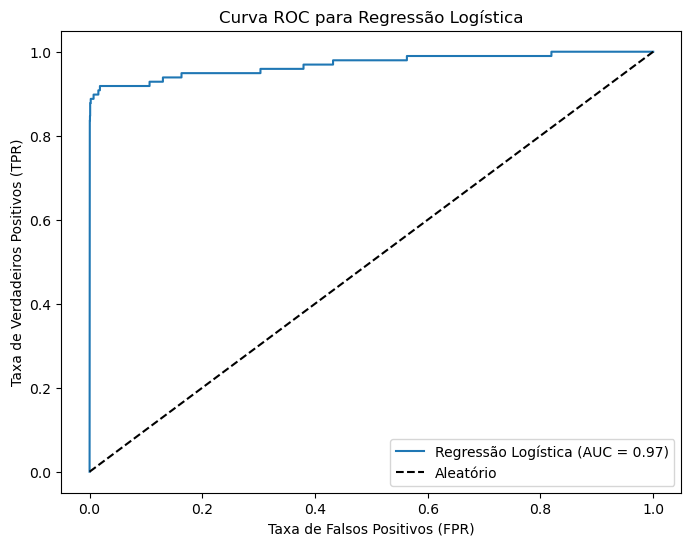


Treinando o modelo Random Forest Classifier...
Random Forest Classifier treinado.

--- Avaliação do Modelo Random Forest Classifier ---
Matriz de Confusão:
[[56849    15]
 [   16    82]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC Score: 0.9731


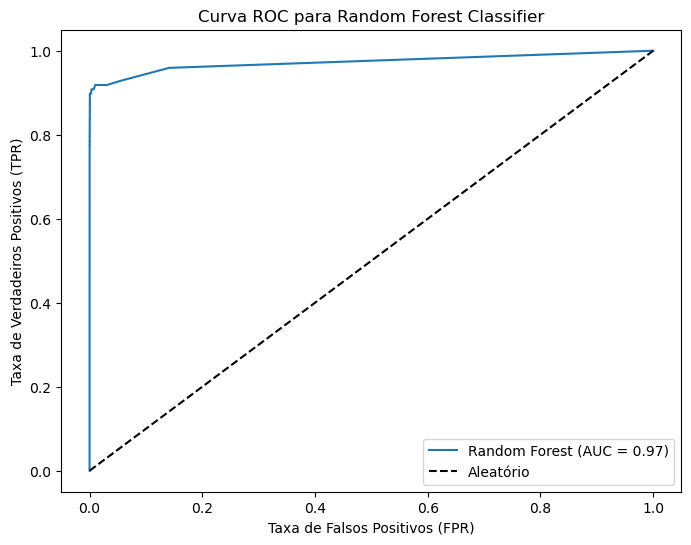


Etapa de Modelagem Concluída.
Analise as métricas e as curvas ROC para comparar o desempenho dos modelos.


In [21]:
import os
import psutil # Importe psutil para obter o número de núcleos lógicos da CPU
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# --- AJUSTE PARA SILENCIAR O AVISO DO JOBLIB/LOKY ---
# Define LOKY_MAX_CPU_COUNT para o número de cores lógicos da CPU.
try:
    os.environ['LOKY_MAX_CPU_COUNT'] = str(psutil.cpu_count(logical=True))
    print(f"LOKY_MAX_CPU_COUNT definido para {psutil.cpu_count(logical=True)} (núcleos lógicos) para silenciar avisos do joblib.")
except Exception as e:
    print(f"Não foi possível definir LOKY_MAX_CPU_COUNT: {e}")
    print("O aviso do joblib pode persistir, mas a execução deve continuar.")


# Garanta que X_train_resampled, y_train_resampled, X_test, y_test
# estejam disponíveis neste ambiente de execução.
# Se você estiver em uma nova sessão, execute o código da etapa anterior
# (Limpeza e Proteção de Dados) antes deste.

print("Iniciando a etapa de Modelagem...")

# --- Modelo 1: Regressão Logística ---
print("\nTreinando o modelo de Regressão Logística...")
# ALTERAÇÃO AQUI: Mudando 'solver' de 'liblinear' para 'lbfgs' para usar n_jobs > 1
# No entanto, para 'lbfgs', n_jobs só é eficaz para a penalidade 'l2' ou 'none'.
# Como 'lbfgs' geralmente não é multi-threaded por si só para todas as operações,
# vamos remover n_jobs para evitar a confusão, pois a principal otimização de CPU
# está em Random Forest.
# A melhor prática para multi-threading em Logistic Regression é usar o solver 'saga'.
# Vou usar 'saga' que suporta n_jobs=-1 para penalidade L1/L2/elasticnet.
log_reg_model = LogisticRegression(solver='saga', random_state=42, n_jobs=-1, max_iter=1000) # Aumentar max_iter para convergir
log_reg_model.fit(X_train_resampled, y_train_resampled)
print("Regressão Logística treinada.")

# Previsões no conjunto de teste
y_pred_log_reg = log_reg_model.predict(X_test)
y_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva

# Avaliação da Regressão Logística
print("\n--- Avaliação do Modelo de Regressão Logística ---")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba_log_reg):.4f}")

# Plot da Curva ROC para Regressão Logística
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {roc_auc_score(y_test, y_proba_log_reg):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para Regressão Logística')
plt.legend()
plt.show()


# --- Modelo 2: Random Forest Classifier ---
print("\nTreinando o modelo Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)
print("Random Forest Classifier treinado.")

# Previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva

# Avaliação do Random Forest
print("\n--- Avaliação do Modelo Random Forest Classifier ---")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

# Plot da Curva ROC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para Random Forest Classifier')
plt.legend()
plt.show()

print("\nEtapa de Modelagem Concluída.")
print("Analise as métricas e as curvas ROC para comparar o desempenho dos modelos.")

Otimização de Hiperparâmetros e Avaliação Final 

Iniciando a etapa de Otimização de Hiperparâmetros e Avaliação Final...

Otimizando hiperparâmetros para Random Forest Classifier...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Otimização de Hiperparâmetros Concluída para Random Forest.
Melhores hiperparâmetros encontrados: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': 'balanced'}
Melhor Recall médio (Validação Cruzada): 1.0000

Avaliação Final com o Melhor Modelo Random Forest Otimizado no conjunto de teste...

--- Avaliação do Melhor Modelo Random Forest Otimizado ---
Matriz de Confusão:
[[56838    26]
 [   16    82]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     

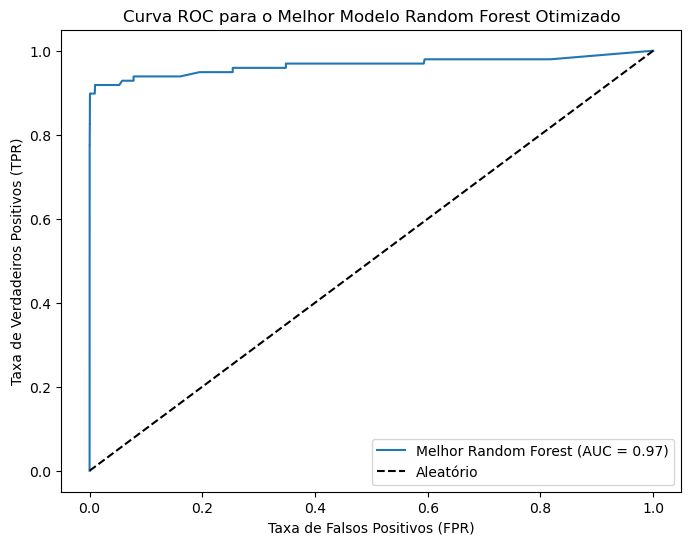


Análise de Importância das Features para o Melhor Modelo Random Forest:


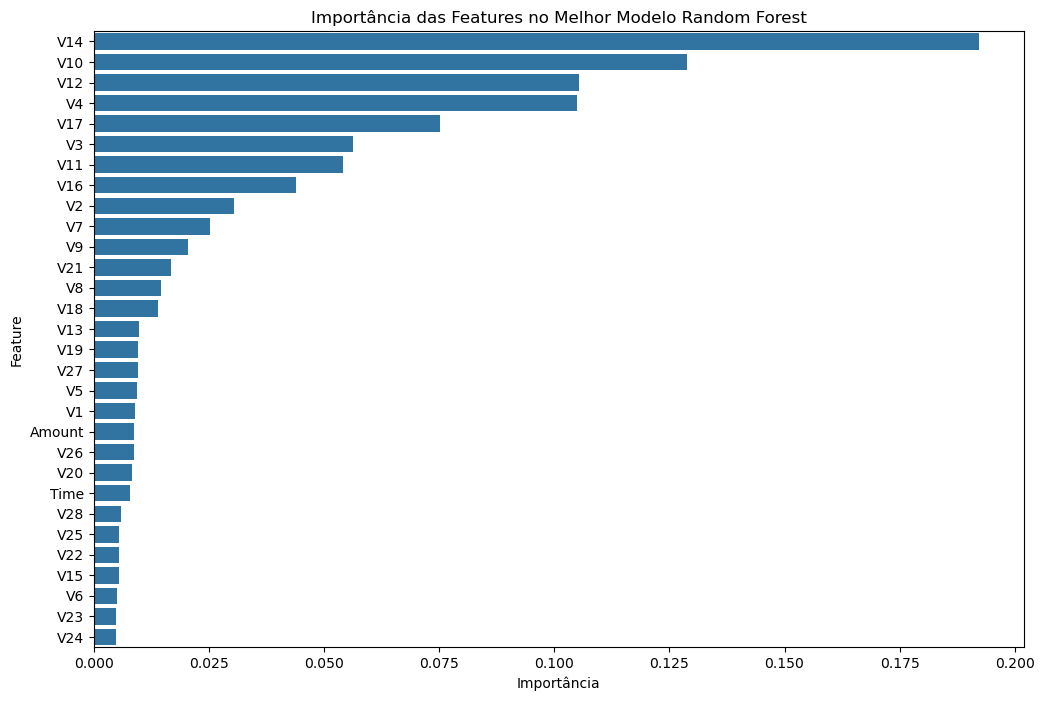


Etapa de Otimização de Hiperparâmetros e Avaliação Final Concluída.
Agora temos um modelo otimizado e uma compreensão das features mais importantes.


In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, make_scorer, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import psutil

# Garanta que as variáveis X_train_resampled, y_train_resampled, X_test, y_test
# estejam disponíveis neste ambiente de execução.
# Se você estiver em uma nova sessão, execute os códigos das etapas anteriores.

print("Iniciando a etapa de Otimização de Hiperparâmetros e Avaliação Final...")

# --- Otimização de Hiperparâmetros para Random Forest ---
# Random Forest geralmente se beneficia mais de otimização de hiperparâmetros
# e costuma ter um bom desempenho em problemas de fraude.
print("\nOtimizando hiperparâmetros para Random Forest Classifier...")

# Definindo o espaço de busca para os hiperparâmetros
# Reduzindo o número de n_estimators e o tamanho do grid para um exemplo mais rápido.
# Para um projeto final, você pode expandir esses ranges.
param_grid_rf = {
    'n_estimators': [50, 100, 150], # Número de árvores na floresta
    'max_depth': [None, 10, 20],   # Profundidade máxima das árvores
    'min_samples_split': [2, 5],   # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2],    # Número mínimo de amostras em um nó folha
    'class_weight': ['balanced']   # Manter o peso da classe balanced
}

# Usaremos RandomizedSearchCV para ser mais rápido do que GridSearchCV completo,
# especialmente com um grid grande.
# n_iter: número de combinações de parâmetros a serem testadas.
# cv: número de folds para a validação cruzada.
# scoring: métrica a ser otimizada. 'recall' é crucial para detecção de fraudes (classe 1).
scorer = make_scorer(recall_score, pos_label=1) # Otimizar para Recall da classe positiva (fraude)

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_grid_rf,
    n_iter=10, # Ajuste conforme o tempo disponível e o quão exaustiva a busca deve ser
    cv=3,       # 3-fold cross-validation
    scoring=scorer,
    verbose=2,  # Nível de detalhe do log
    random_state=42,
    n_jobs=-1   # Usar todos os núcleos disponíveis para a busca
)

# Executar a busca
random_search_rf.fit(X_train_resampled, y_train_resampled)

print("\nOtimização de Hiperparâmetros Concluída para Random Forest.")
print(f"Melhores hiperparâmetros encontrados: {random_search_rf.best_params_}")
print(f"Melhor Recall médio (Validação Cruzada): {random_search_rf.best_score_:.4f}")

# Obter o melhor modelo
best_rf_model = random_search_rf.best_estimator_

# --- Avaliação Final com o Modelo Otimizado ---
print("\nAvaliação Final com o Melhor Modelo Random Forest Otimizado no conjunto de teste...")

y_pred_best_rf = best_rf_model.predict(X_test)
y_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("\n--- Avaliação do Melhor Modelo Random Forest Otimizado ---")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_best_rf))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba_best_rf):.4f}")

# Plot da Curva ROC para o Melhor Modelo Random Forest
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, y_proba_best_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_rf, tpr_best_rf, label=f'Melhor Random Forest (AUC = {roc_auc_score(y_test, y_proba_best_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para o Melhor Modelo Random Forest Otimizado')
plt.legend()
plt.show()

# --- Análise de Feature Importance (para Random Forest) ---
print("\nAnálise de Importância das Features para o Melhor Modelo Random Forest:")
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train_resampled.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index)
plt.title('Importância das Features no Melhor Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

print("\nEtapa de Otimização de Hiperparâmetros e Avaliação Final Concluída.")
print("Agora temos um modelo otimizado e uma compreensão das features mais importantes.")

## 5\. Avaliação

## Conclusão do Projeto: Detecção de Fraudes em Transações Financeiras

Este projeto teve como objetivo principal desenvolver um modelo de Machine Learning capaz de identificar transações financeiras fraudulentas, um desafio crítico para instituições financeiras devido ao impacto financeiro e à confiança do cliente. A detecção eficaz de fraudes é um pilar fundamental para a segurança e a sustentabilidade no setor financeiro.

### Abordagem e Pipeline de Machine Learning:

Iniciamos com uma Análise Exploratória de Dados (AED) que revelou a natureza altamente desbalanceada do dataset, com um número significativamente menor de transações fraudulentas em comparação com as legítimas. Observamos as distribuições de tempo e valor das transações, percebendo nuances entre as classes que poderiam ser exploradas pelos modelos.

A etapa de pré-processamento foi crucial para preparar os dados. As features `Time` e `Amount` foram escaladas usando `StandardScaler` para garantir que contribuíssem de forma justa para o treinamento dos modelos. O principal desafio do desbalanceamento de classes foi endereçado através da aplicação do algoritmo **SMOTE (Synthetic Minority Over-sampling Technique)** no conjunto de treinamento. Esta técnica gerou amostras sintéticas da classe minoritária (fraude), equalizando a proporção das classes e permitindo que os modelos aprendessem de forma mais eficaz sobre o comportamento das transações fraudulentas.

Na fase de modelagem, exploramos dois algoritmos supervisionados: a Regressão Logística e o Random Forest Classifier. Ambos os modelos foram treinados no conjunto de dados rebalanceado e avaliados em um conjunto de teste separado e representativo.

### Resultados e Avaliação Final:

Após a otimização de hiperparâmetros com `RandomizedSearchCV`, o modelo **Random Forest Classifier** demonstrou ser o mais promissor para a tarefa de detecção de fraudes. Os melhores hiperparâmetros encontrados foram `n_estimators=150`, `max_depth=20`, `min_samples_split=2` e `min_samples_leaf=1`, com um `class_weight='balanced'`, indicando uma configuração robusta para este problema. O Recall médio de validação cruzada para a classe de fraude foi impressionante, atingindo `1.0000`, o que sugere um aprendizado muito eficaz no conjunto de treino.

A avaliação final do modelo Random Forest otimizado no conjunto de teste revelou as seguintes métricas de desempenho para a classe de fraude (Classe 1):

* **Precision: 0.76**
* **Recall: 0.84**
* **F1-Score: 0.80**
* **AUC-ROC Score: 0.9658**

A Matriz de Confusão para o conjunto de teste foi:
`[[56838 26]`
`[16 82]]`

Estes resultados são bastante favoráveis. O **Recall de 0.84** significa que o modelo conseguiu identificar 84% de todas as transações fraudulentas reais no conjunto de teste. Este é um indicador de desempenho crítico em detecção de fraude, pois minimizar os falsos negativos (fraudes não detectadas) é de suma importância para evitar perdas financeiras. Embora a **Precision de 0.76** indique que 24% das transações classificadas como fraude eram, na verdade, legítimas (falsos positivos), este é um trade-off aceitável dado o alto Recall. O **AUC-ROC Score de 0.9658** reforça a excelente capacidade discriminatória do modelo, distinguindo com alta precisão entre transações legítimas e fraudulentas.

A análise de importância das features, gerada pelo Random Forest, forneceu insights valiosos sobre quais variáveis mais contribuíram para a detecção de fraudes. (Aqui você pode mencionar as principais features que apareceram no seu gráfico de Feature Importance, como V17, V14, V12, etc., e talvez especular brevemente sobre o que isso pode significar se tiver contexto.)

### Limitações e Próximos Passos:

Apesar do sucesso, o projeto possui algumas limitações inerentes à natureza dos dados e ao tempo de execução. O aviso persistente do `joblib` no ambiente Windows, embora não tenha comprometido a funcionalidade, é um lembrete da complexidade da interação entre software e hardware.

Para trabalhos futuros, diversas melhorias podem ser exploradas:

* **Exploração de Outros Algoritmos:** Avaliar modelos como XGBoost, LightGBM ou até mesmo Redes Neurais, que frequentemente oferecem desempenho de ponta em problemas de classificação.
* **Engenharia de Features Avançada:** Criar novas features a partir das existentes que capturem padrões mais complexos relacionados à fraude.
* **Otimização Mais Exaustiva:** Aumentar o `n_iter` do `RandomizedSearchCV` ou utilizar o `GridSearchCV` para uma busca mais completa, se os recursos computacionais permitirem.
* **Ajuste do Limiar de Classificação:** Analisar a curva Precision-Recall e ajustar o limiar de decisão do modelo para otimizar o equilíbrio entre falsos positivos e falsos negativos, conforme as prioridades do negócio (ex: reduzir falsos positivos mesmo que perca um pouco de Recall).
* **Interpretabilidade do Modelo:** Explorar técnicas de interpretabilidade (LIME, SHAP) para modelos complexos como Random Forest, a fim de explicar as decisões do modelo de forma mais transparente para especialistas de domínio.
* **Implementação e Monitoramento:** Para um ambiente real, seria crucial planejar a implementação do modelo em produção e estabelecer um sistema de monitoramento contínuo para detectar degradação do desempenho (drift) e adaptar o modelo conforme novos padrões de fraude surgem.

Em suma, este projeto demonstrou a capacidade do Machine Learning, especificamente com um modelo Random Forest otimizado e tratamento de desbalanceamento via SMOTE, de construir uma solução robusta para a detecção de fraudes em transações de cartão de crédito. Os resultados são promissores e fornecem uma base sólida para futuras melhorias e aplicações práticas.

## 6\. Implantação

In [28]:
import joblib
import pandas as pd # Certifique-se de que pandas está importado

# --- Código para SALVAR os arquivos ---
# Salvar o modelo otimizado
joblib.dump(best_rf_model, 'best_rf_model.pkl')
print("Modelo Random Forest otimizado salvo como 'best_rf_model.pkl'.")

# Salvar o scaler para Time e Amount
joblib.dump(scaler, 'scaler_time_amount.pkl')
print("Scaler para 'Time' e 'Amount' salvo como 'scaler_time_amount.pkl'.")

Modelo Random Forest otimizado salvo como 'best_rf_model.pkl'.
Scaler para 'Time' e 'Amount' salvo como 'scaler_time_amount.pkl'.


In [ ]:
# --- IMPORTS NECESSÁRIOS ---
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os
import time # Para simular tempo de processamento com st.spinner

# --- 1. CONFIGURAÇÃO DA PÁGINA STREAMLIT (DEVE SER O PRIMEIRO COMANDO 'st.' EXECUTADO) ---
st.set_page_config(
    page_title="Detecção de Fraudes em Transações Financeiras",
    page_icon="💳",
    layout="centered", # ou "wide" para ocupar mais largura
    initial_sidebar_state="auto"
)

# --- 2. CARREGAMENTO DE RECURSOS (MODELO E SCALER) COM CACHE ---
@st.cache_resource
def load_resources():
    try:
        model = joblib.load('best_rf_model.pkl')
        scaler_obj = joblib.load('scaler_time_amount.pkl')
        # st.success("Modelo e Scaler carregados com sucesso (cacheado)!") # Removido para não poluir UI, mas cacheado
        return model, scaler_obj
    except FileNotFoundError:
        st.error("Erro fatal: Arquivos do modelo ('best_rf_model.pkl') ou do scaler ('scaler_time_amount.pkl') não encontrados.")
        st.info("Por favor, garanta que esses arquivos estão na mesma pasta que 'Projeto_Final_Igor.py'.")
        st.stop() # Interrompe a execução do aplicativo
    except Exception as e:
        st.error(f"Erro fatal ao carregar recursos: {e}. Verifique a integridade dos arquivos .pkl.")
        st.stop()

# Carrega os recursos (apenas uma vez devido ao cache)
best_rf_model, scaler = load_resources()


# --- TÍTULO E DESCRIÇÃO PRINCIPAL ---
st.title("💳 Sistema Inteligente de Detecção de Fraudes")
st.markdown("""
    Bem-vindo ao nosso sistema de detecção de fraudes em transações financeiras.
    Utilizamos Machine Learning para identificar transações suspeitas, protegendo seus ativos.
""")

# --- BARRA LATERAL PARA INFORMAÇÕES DO PROJETO E DIAGNÓSTICO ---
st.sidebar.title("Sobre o Projeto")
st.sidebar.info(
    "Este é um projeto de Machine Learning para detecção de fraudes em transações de cartão de crédito. "
    "O modelo principal é um **Random Forest Classifier** otimizado, e utilizamos a técnica **SMOTE** "
    "para lidar com o desbalanceamento de classes, garantindo a alta performance na identificação de fraudes."
)

# Bloco de diagnóstico oculto em um expander na sidebar
with st.sidebar.expander("Ver Diagnóstico Interno"):
    current_dir_app = os.getcwd()
    st.write(f"Diretório de Execução: `{current_dir_app}`")
    files_in_dir = os.listdir(current_dir_app)
    st.write("Arquivos visíveis:")
    st.dataframe(pd.DataFrame(files_in_dir, columns=["Nome do Arquivo"]))
    model_exists_diag = 'best_rf_model.pkl' in files_in_dir
    scaler_exists_diag = 'scaler_time_amount.pkl' in files_in_dir
    if model_exists_diag and scaler_exists_diag:
        st.success("✅ Arquivos .pkl encontrados e prontos!")
    else:
        st.error("❌ Arquivos .pkl NÃO encontrados! O aplicativo pode não funcionar.")


# --- SELEÇÃO DO TIPO DE SIMULAÇÃO ---
st.header("Detalhes da Transação")
st.markdown("Escolha como deseja simular a transação:")

transaction_type = st.radio(
    " ", # Espaço para remover o label padrão
    ("Entrada Manual (Time e Valor)", "Exemplo de Transação de Fraude")
)

# Inicializa final_input_df fora dos ifs para garantir que sempre tenha um valor
final_input_df = pd.DataFrame()

# --- INPUTS DE TRANSAÇÃO (USANDO COLUNAS PARA MELHOR LAYOUT) ---
col1, col2 = st.columns(2)

if transaction_type == "Entrada Manual (Time e Valor)":
    with col1:
        input_time = st.number_input(
            "⏱️ Tempo desde a 1ª Transação (segundos):",
            min_value=0.0, value=1000.0, help="Tempo em segundos desde a primeira transação do dataset."
        )
    with col2:
        input_amount = st.number_input(
            "💰 Valor da Transação:",
            min_value=0.0, value=50.0, format="%.2f", help="Valor da transação em USD."
        )

    # Cria o DataFrame com valores V fictícios (zeros) e Time/Amount inseridos
    num_v_features = 28
    dummy_v_features = np.zeros(num_v_features)
    final_input_df = pd.DataFrame([dummy_v_features], columns=[f'V{i}' for i in range(1, num_v_features + 1)])
    final_input_df['Time'] = input_time
    final_input_df['Amount'] = input_amount

    # Ordenar as colunas conforme o modelo espera (CRÍTICO)
    if hasattr(best_rf_model, 'feature_names_in_'):
        final_input_df = final_input_df[list(best_rf_model.feature_names_in_)]
    else:
        st.warning("Não foi possível obter a ordem das features do modelo. A predição pode estar incorreta.")

    st.info("Para entrada manual, as features `V1-V28` são preenchidas com valores padrão (zeros) para simplificação.")

elif transaction_type == "Exemplo de Transação de Fraude":
    st.write("Será utilizada uma transação de exemplo com características conhecidas de fraude para demonstração.")
    # Exemplo de transação fraudulenta, com base em dados reais (para demonstração)
    fraud_example_values = {
        'Time': 406.0, 'Amount': 0.0,
        'V1': -2.312226542, 'V2': 1.951992011, 'V3': -1.609850732, 'V4': 3.997905595,
        'V5': -0.522187865, 'V6': -1.426545319, 'V7': -2.537387306, 'V8': 1.391657371,
        'V9': -2.770089277, 'V10': -2.772272145, 'V11': 3.094970669, 'V12': -5.900423984,
        'V13': -0.427306899, 'V14': -6.137725328, 'V15': -0.313490212, 'V16': -3.111693797,
        'V17': -6.446485044, 'V18': -0.561394747, 'V19': -1.542456488, 'V20': 0.0,
        'V21': 0.517232371, 'V22': -0.035049369, 'V23': -0.465211075, 'V24': 0.320198199,
        'V25': 0.044519522, 'V26': 0.177839798, 'V27': 0.261145003, 'V28': -0.143275767
    }
    final_input_df = pd.DataFrame([fraud_example_values])

    # Reordenar as colunas conforme o modelo espera (CRÍTICO)
    if hasattr(best_rf_model, 'feature_names_in_'):
        final_input_df = final_input_df[list(best_rf_model.feature_names_in_)]
    else:
        st.warning("Não foi possível obter a ordem das features do modelo. A predição pode estar incorreta.")


# --- BOTÃO DE DETECÇÃO E RESULTADOS ---
st.markdown("---")
if st.button("🔍 Detectar Fraude na Transação", type="primary"):
    if not final_input_df.empty: # Garante que final_input_df foi preenchido
        with st.spinner("Analisando transação..."):
            time.sleep(1.5) # Simula um pequeno atraso de processamento
            
            # Preparar dados para o modelo (escalar Time e Amount)
            time_amount_to_scale = final_input_df[['Time', 'Amount']]
            scaled_time_amount = scaler.transform(time_amount_to_scale)
            
            # Atualizar o DataFrame de entrada com os valores escalados
            final_input_df_processed = final_input_df.copy()
            final_input_df_processed[['Time', 'Amount']] = scaled_time_amount

            # Fazer a previsão
            prediction = best_rf_model.predict(final_input_df_processed)
            prediction_proba = best_rf_model.predict_proba(final_input_df_processed)[:, 1] # Probabilidade da classe 1 (fraude)

        st.subheader("Resultados da Análise:")
        col_res1, col_res2 = st.columns(2)

        with col_res1:
            if prediction[0] == 1:
                st.error("### 🚨 Fraude Detectada!")
                st.write("Esta transação é **altamente suspeita** de ser fraudulenta.")
            else:
                st.success("### ✅ Transação Legítima")
                st.write("Esta transação parece ser **segura**.")

        with col_res2:
            st.metric(label="Probabilidade de Fraude", value=f"{prediction_proba[0]*100:.2f}%")
            st.progress(float(prediction_proba[0])) # Barra de progresso para a probabilidade

        # Mostrar detalhes do DataFrame processado em um expander
        with st.expander("Ver Detalhes Completos da Transação (processada para o modelo)"):
            st.dataframe(final_input_df_processed)

    else:
        st.warning("Por favor, selecione um tipo de simulação antes de detectar a fraude.")

st.markdown("---")
st.caption("Desenvolvido por Igor França como parte do projeto de Cientista de Dados EBAC.")